In [16]:
%matplotlib inline

In [21]:
# Import Dependencies
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import numpy as np
import wordcloud
from wordcloud import WordCloud, STOPWORDS

In [19]:
# Extracting final dataset for ML
path = "Final_Movies_dataset.csv"
movies = pd.read_csv(path)
movies.head(50)

,budget_ds-movies,genre,gross,score,popularity,revenue,title,Ave_runtime,Rotten Tomatoes,Netflix,...,original_language_en,original_language_es,original_language_fr,original_language_hi,original_language_it,original_language_ja,original_language_ko,original_language_nl,original_language_pt,original_language_zh
0,16000000.0,Action,5900000.0,7.2,29.253833,5900000,Highlander,116.0,69,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,25000000.0,Action,79817937.0,5.9,15.262130,79817939,The Golden Child,94.0,26,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,16000000.0,Adventure,30857814.0,8.1,44.533612,30857814,The Princess Bride,98.0,97,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1000000.0,Horror,14564027.0,7.0,22.583834,14564027,Hellraiser,94.0,70,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6500000.0,Biography,54215416.0,6.8,6.847099,54215416,La Bamba,108.0,90,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3500000.0,Comedy,14000000.0,6.0,10.729884,14000000,Creepshow 2,92.0,32,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,3000000.0,Comedy,7888703.0,3.2,4.103764,0,Teen Wolf Too,95.0,7,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,100000.0,Comedy,5228617.0,7.0,2.353483,0,Hollywood Shuffle,78.0,88,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,15000000.0,Drama,316199.0,5.7,13.568302,8138788,Promised Land,104.0,52,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,15000000.0,Drama,7597898.0,6.6,13.568302,8138788,Promised Land,103.0,52,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# Get summary statistics for score
movies['score'].describe()

count    594.000000
mean       6.583165
std        0.949387
min        2.900000
25%        6.000000
50%        6.600000
75%        7.200000
max        9.000000
Name: score, dtype: float64

## Content-Based Recommendation Engine

In [29]:
# use TfidfVectorizer function from scikit-learn, which transforms text to feature vectors that can be used as input to estimator
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(movies['genre'])
tfidf_matrix

<594x15 sparse matrix of type '<class 'numpy.float64'>'
	with 596 stored elements in Compressed Sparse Row format>

In [30]:
# Use the Cosine Similarity to calculate a numeric quantity that denotes the similarity between two movies
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1., 1., 0., ..., 1., 0., 0.],
       [1., 1., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [9]:
# Write a function that returns the 20 most similar movies based on the cosine similarity score
# Build a 1-dimensional array with movie titles
titles = movies['title']
indices = pd.Series(movies.index, index=movies['title'])

# Function that get movie recommendations based on the cosine similarity score of movie genres
def genre_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [11]:
# Get the top recommendations based on a movie title
genre_recommendations('Back to the Future Part II').head(20)

17                            Back to the Future Part II
23                           Back to the Future Part III
28                            Bill & Ted's Bogus Journey
30                                            White Fang
39                                         Cool Runnings
40                           The Adventures of Huck Finn
69           Austin Powers: International Man of Mystery
134                                       102 Dalmatians
139                                             Snow Day
152                                             Rat Race
155                                          The Mexican
184                                            Snow Dogs
186                                    The Four Feathers
199                                                Holes
205                                   The Cat in the Hat
210                             The Lizzie McGuire Movie
245                    Charlie and the Chocolate Factory
249    The Chronicles of Narnia

In [13]:
genre_recommendations('Aladdin').head(20)

31                         Aladdin
41                   The Lion King
45                       Toy Story
67                       Anastasia
83                           Mulan
86                    A Bug's Life
87             The Prince of Egypt
97                            Antz
98               The Rugrats Movie
114                    Toy Story 2
118                  Fantasia 2000
127       The Emperor's New Groove
128          The Road to El Dorado
129                       Dinosaur
130                    Chicken Run
140    Rugrats in Paris: The Movie
143               The Tigger Movie
146                 Monsters, Inc.
149      Atlantis: The Lost Empire
160      Jimmy Neutron: Boy Genius
Name: title, dtype: object

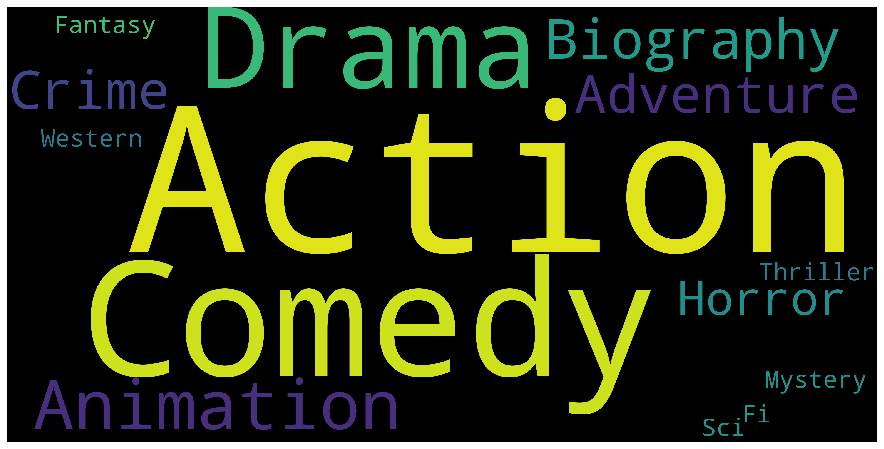

In [26]:
# Create a wordcloud of the movie genre
movies['genre'] = movies['genre'].fillna("").astype('str')
genre_corpus = ' '.join(movies['genre'])
genre_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(genre_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(genre_wordcloud)
plt.axis('off')
plt.show()

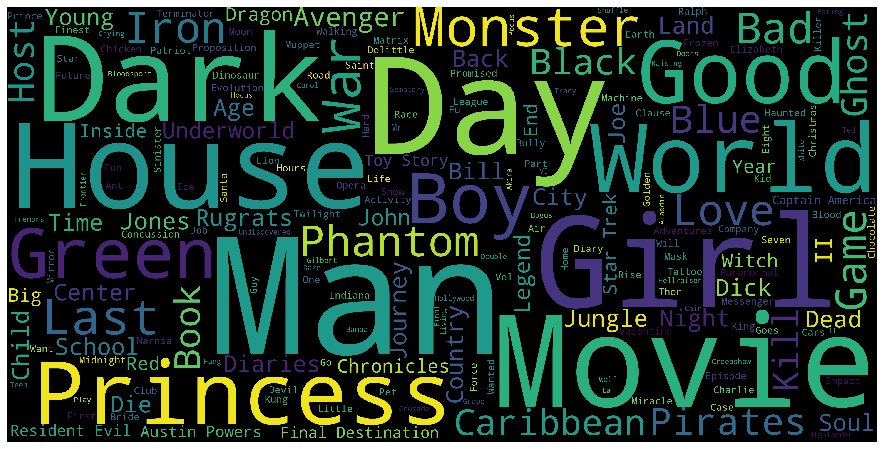

In [22]:
# Create a wordcloud of the movie titles
movies['title'] = movies['title'].fillna("").astype('str')
title_corpus = ' '.join(movies['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()